In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Week-3

**Note to Learners**:

- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment.

**Do not edit this cell.**

In [52]:
np.random.seed(0)

N = 2000
data1 = np.random.randn(N//3,2) + np.array([2,2])
data2 = np.random.randn(N//3,2) + np.array([-3,-3])
data3 = np.random.randn(N//3,2) + np.array([-5,3])
X = np.concatenate((data1, data2, data3))


## Problem 1
How many samples are there in the dataset?



## Solution

In [53]:
X.shape[0]

1998

## Problem 2

How many features are there in the dataset?


## Solution

In [54]:
X.shape[1]

2

## Problem 3
Plot the dataset using matplotlib.



## Solution

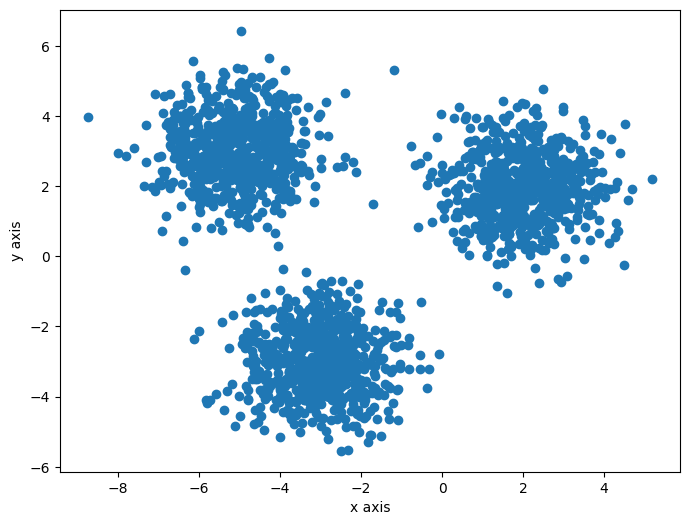

In [55]:
x = X[:,0]
y = X[:,1]
plt.figure(figsize=(8,6))
plt.scatter(x,y)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

## Instruction

Assume k = 3. Take the data points with indices 200, 800 and 1200 in X to be the initial cluster centers.


In [56]:
k = 3
cluster_centers=np.array([X[200],X[800],X[1200]])
cluster_centers

array([[ 1.40134606,  0.88410301],
       [-2.56922887, -3.14989159],
       [-2.84782302, -3.37412632]])

## Problem 4

Write a function `assign_clusters(X, k, cluster_centers)` that assigns a cluster to each data point as per their distance from each cluster centre and returns a vector `z`, where $z[i] \in \{0, 1, 2\}$.

What is the mean of the values in vector `z`? Provide the answer correct up to three decimal places.



## Solution

In [57]:
def assign_clusters(X, k, cluster_centers):
  z = np.zeros(X.shape[0])
  for i in range(X.shape[0]):
    d = np.zeros(cluster_centers.shape[0])
    for j in range(cluster_centers.shape[0]):
      d[j] = np.linalg.norm(X[i]-cluster_centers[j]) # distance
    z[i] = np.argmin(d)
  return z

z = assign_clusters(X,k,cluster_centers)
# print(z)
np.mean(z)

0.7107107107107107

## Problem 5

Plot the data points, with different color for different clusters.


## Solution

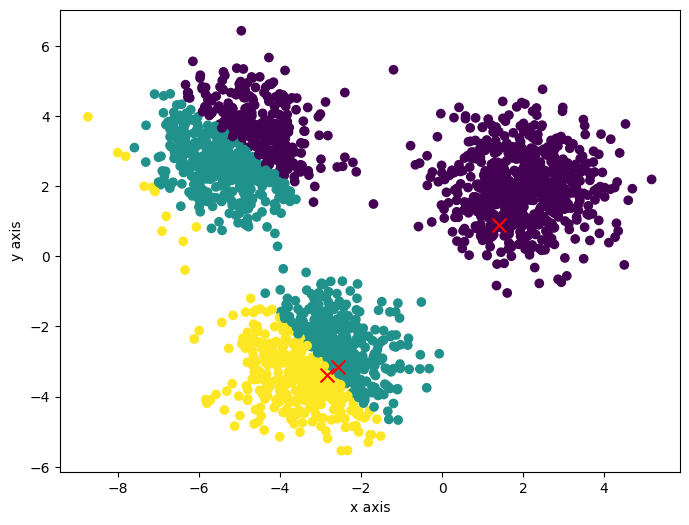

In [58]:
x = X[:,0]
y = X[:,1]
plt.figure(figsize=(8,6))
plt.scatter(x,y,c=z) # c attribute is using for colors
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker='x', s=100, color='red')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

## Problem 6
Write a function `compute_cluster_centers(X, z, k)` that computes the clusters' centers as per z and returns `k` new cluster centers.

What is the mean of the three cluster centers? Provide the $x_1$ and $y_1$ component. Provide both components correct up to three decimal places.



## Solution

In [59]:
def compute_cluster_centers(X, z, k):
  cluster_centers = np.array([np.mean(X[z == label], axis=0) for label in np.unique(z)])
  return cluster_centers
cluster_centers = compute_cluster_centers(X, z, k)
np.mean(compute_cluster_centers(X, z, k),axis=0)

array([-2.55251646, -0.19225194])

## Extra

Keep executing the code in problems 4, 5 and 6 (for, say, 10 iterations) to observe how the clusters change across different iterations.

## Solution

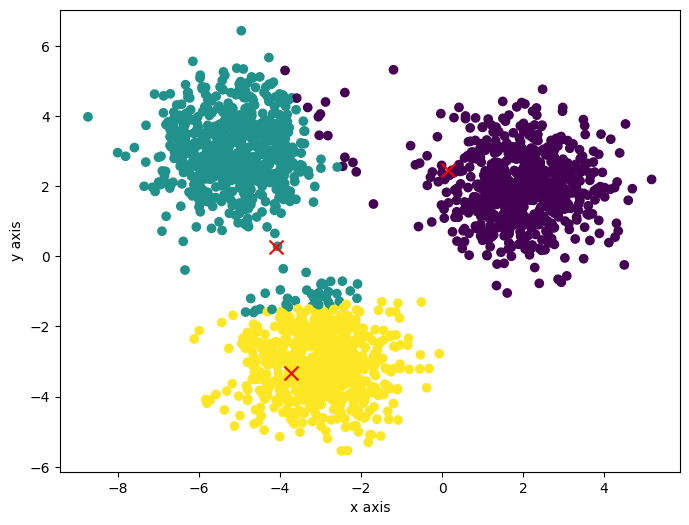

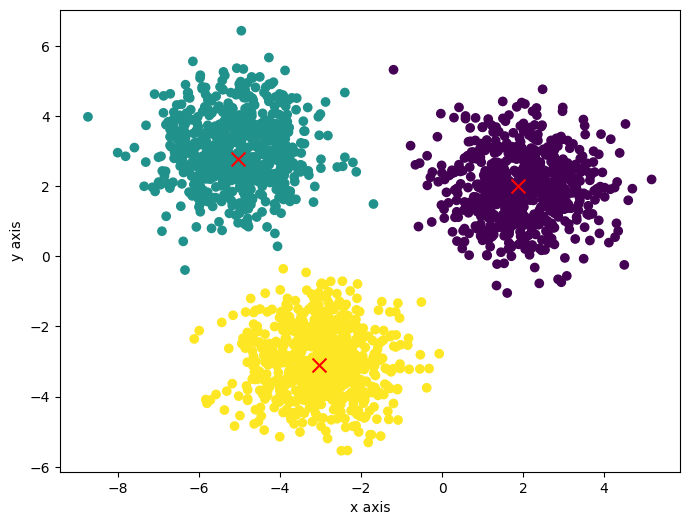

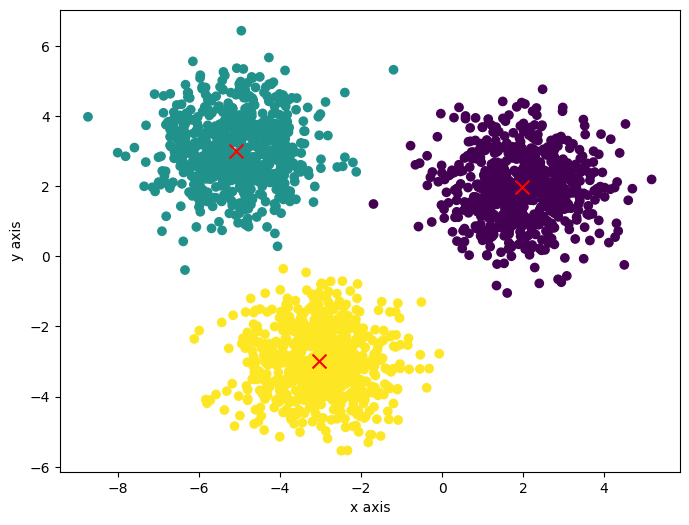

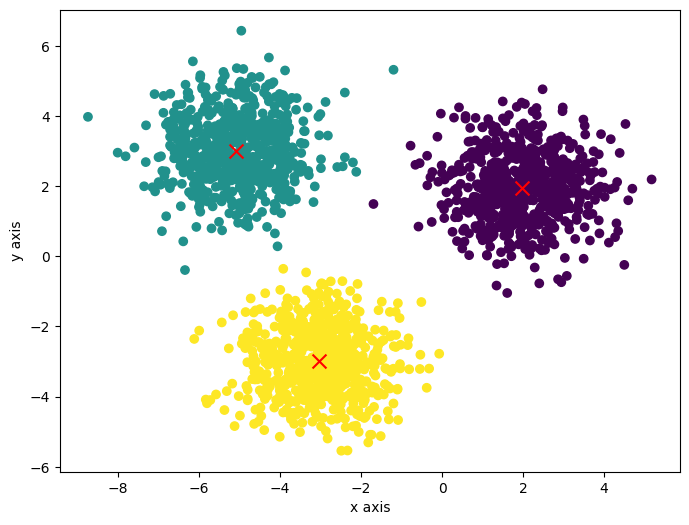

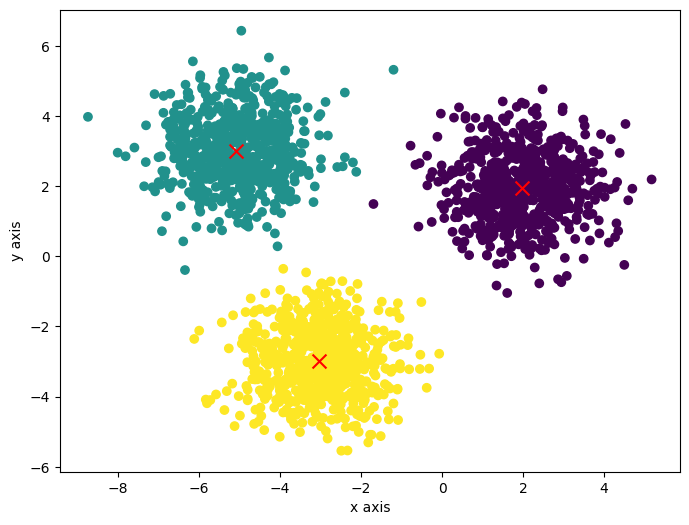

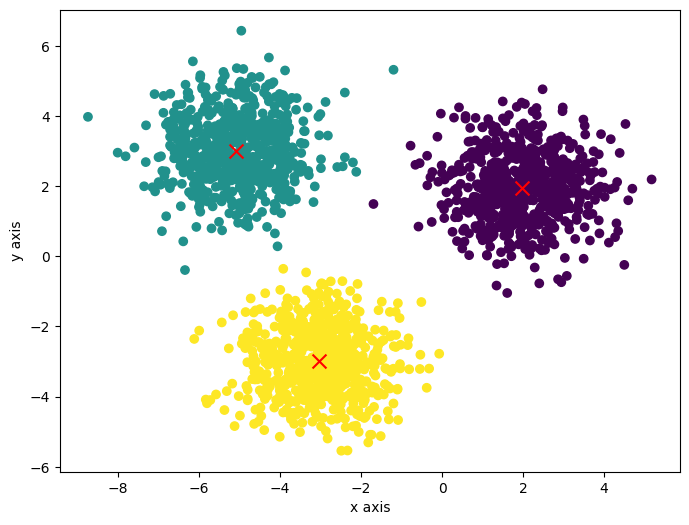

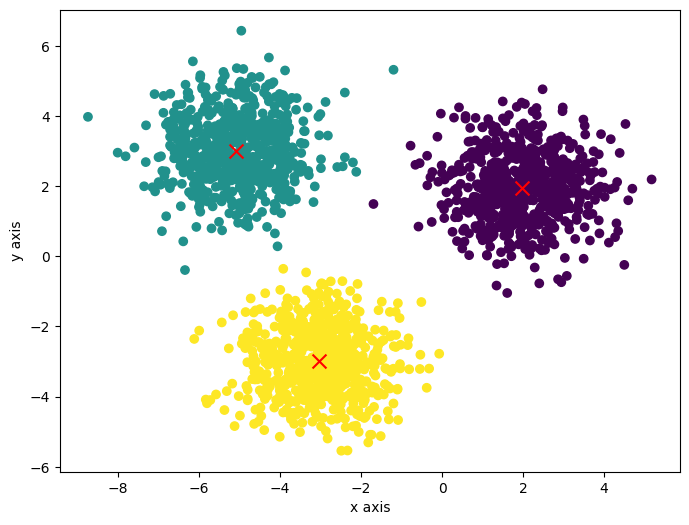

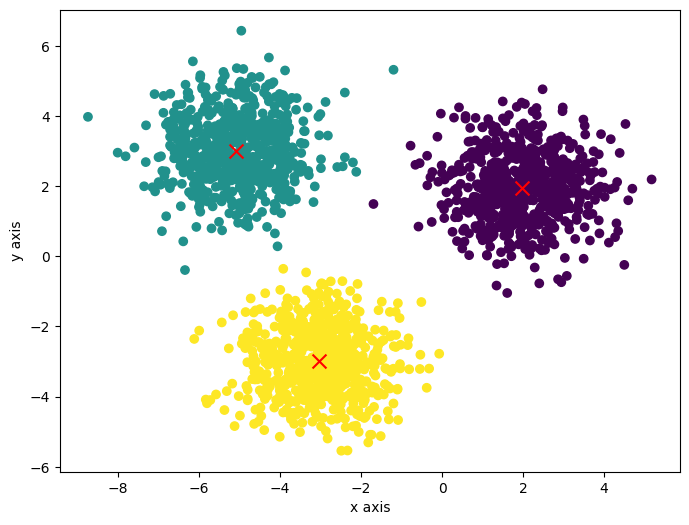

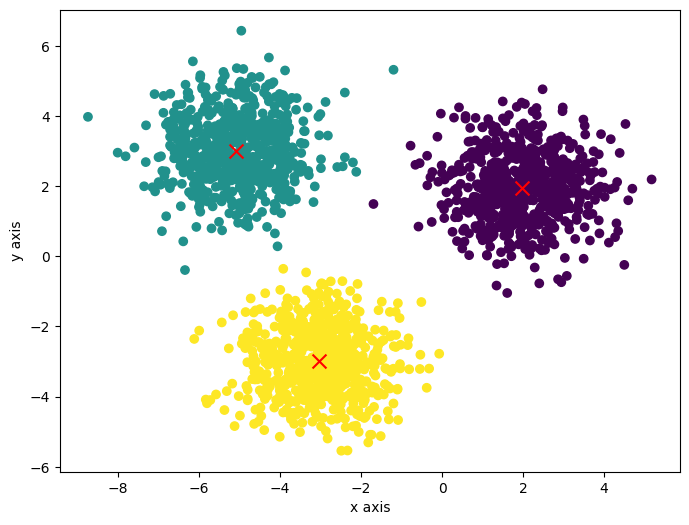

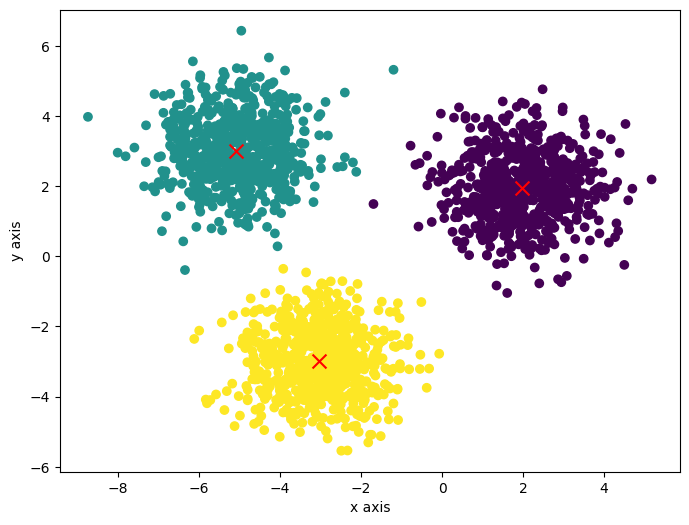

In [60]:
for i in range(10):
  z = assign_clusters(X,k,cluster_centers)
  x = X[:,0]
  y = X[:,1]
  plt.figure(figsize=(8,6))
  plt.scatter(x,y,c=z) # c attribute is using for colors
  plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker='x', s=100, color='red')
  plt.xlabel('x axis')
  plt.ylabel('y axis')
  plt.show()
  cluster_centers = compute_cluster_centers(X, z, k)